## Vector Machines

Create Hyperplanes by modifying dimensions

In [69]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import f1_score
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [32]:
df = pd.read_csv('cell_samples.csv')

In [33]:
df

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


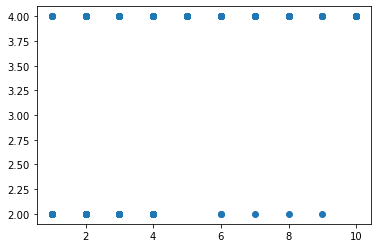

In [34]:
plt.scatter(df['UnifSize'] , df['Class'])


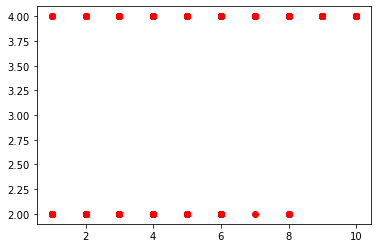

In [35]:
plt.scatter(df['Clump'] , df['Class'] , color='red')

In [36]:
df.head(0)

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class


In [37]:
df['BareNuc']

0       1
1      10
2       2
3       4
4       1
       ..
694     2
695     1
696     3
697     4
698     5
Name: BareNuc, Length: 699, dtype: object

In [39]:
df = df[pd.to_numeric(df['BareNuc'], errors='coerce').notnull()]
df['BareNuc'] = df['BareNuc'].astype('int64')
df.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int64
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [40]:
cdf = np.asarray(df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']])

In [41]:
cdf

array([[ 5,  1,  1, ...,  3,  1,  1],
       [ 5,  4,  4, ...,  3,  2,  1],
       [ 3,  1,  1, ...,  3,  1,  1],
       ...,
       [ 5, 10, 10, ...,  8, 10,  2],
       [ 4,  8,  6, ..., 10,  6,  1],
       [ 4,  8,  8, ..., 10,  4,  1]], dtype=int64)

In [57]:
y = np.asarray(df['Class'].astype('int64'))

In [58]:
y

array([2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 4, 4, 2, 2, 4, 2, 4, 4,
       2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 4, 4, 4, 4, 4, 2,
       4, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 2, 4, 2, 4,
       4, 2, 2, 4, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 2, 4, 2, 4,
       4, 4, 2, 2, 2, 4, 2, 2, 2, 2, 4, 4, 4, 2, 4, 2, 4, 2, 2, 2, 4, 2,
       2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 4, 2, 4, 4, 2, 2, 4, 2, 2,
       4, 4, 2, 2, 2, 2, 4, 4, 2, 2, 2, 2, 2, 4, 4, 4, 2, 4, 2, 4, 2, 2,
       2, 4, 4, 2, 4, 4, 4, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2, 2,
       2, 4, 4, 2, 2, 2, 4, 4, 2, 4, 4, 4, 2, 2, 4, 2, 2, 4, 4, 4, 4, 2,
       4, 4, 2, 4, 4, 4, 2, 4, 2, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 4, 4, 2,
       2, 4, 2, 4, 4, 4, 2, 2, 2, 2, 4, 4, 4, 4, 4, 2, 4, 4, 4, 2, 4, 2,
       4, 4, 2, 2, 2, 2, 4, 2, 2, 4, 4, 4, 4, 4, 2, 4, 4, 2, 2, 4, 4, 2,
       2, 4, 4, 2, 4, 2, 4, 4, 2, 2, 4, 2, 2, 2, 4,

In [59]:
x_train , x_test , y_train , y_test = train_test_split(cdf , y , test_size = 0.2, random_state=4)

In [60]:
x_train

array([[ 9, 10, 10, ..., 10, 10, 10],
       [ 2,  1,  1, ...,  3,  1,  1],
       [ 4,  1,  1, ...,  1,  1,  1],
       ...,
       [ 2,  3,  1, ...,  1,  1,  1],
       [ 1,  1,  1, ...,  3,  1,  1],
       [ 5,  4,  6, ...,  8, 10,  1]], dtype=int64)

In [61]:
x_test

array([[ 3,  1,  1, ...,  2,  1,  2],
       [ 5, 10, 10, ...,  7, 10,  1],
       [ 5,  1,  1, ...,  2,  1,  1],
       ...,
       [ 1,  1,  1, ...,  2,  1,  1],
       [ 4,  1,  1, ...,  3,  2,  1],
       [10, 10, 10, ...,  5,  3,  3]], dtype=int64)

In [62]:
y_train

array([4, 2, 2, 4, 4, 2, 2, 2, 4, 4, 4, 2, 2, 2, 2, 4, 4, 2, 4, 2, 2, 4,
       2, 2, 2, 4, 2, 2, 4, 2, 4, 4, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2,
       2, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2,
       4, 4, 2, 4, 2, 4, 4, 2, 2, 4, 2, 2, 4, 4, 2, 2, 2, 4, 2, 4, 2, 4,
       4, 2, 2, 4, 2, 2, 4, 4, 4, 4, 2, 4, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2,
       4, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 4, 2, 2, 4, 2,
       2, 4, 4, 4, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2, 2,
       2, 4, 2, 4, 2, 4, 2, 4, 4, 2, 2, 4, 2, 2, 4, 2, 4, 2, 4, 2, 2, 2,
       4, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 4, 2, 2, 4, 2, 2, 4, 2, 2, 4,
       2, 2, 2, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2,
       2, 4, 2, 2, 4, 2, 2, 4, 2, 2, 2, 2, 4, 2, 4, 4, 4, 2, 4, 4, 4, 2,
       2, 4, 2, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2, 2, 2, 2,
       4, 2, 2, 4, 4, 4, 2, 4, 4, 4, 2, 2, 2, 2, 4, 2, 4, 4, 4, 4, 4, 2,
       2, 2, 2, 4, 4, 2, 2, 4, 2, 2, 2, 4, 4, 2, 4,

In [63]:
y_test

array([2, 4, 2, 4, 2, 2, 2, 2, 4, 2, 2, 4, 4, 4, 4, 2, 2, 2, 2, 2, 4, 2,
       4, 4, 2, 2, 2, 2, 4, 4, 4, 2, 4, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4,
       4, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 4, 4, 2, 2, 4,
       4, 2, 2, 2, 4, 4, 2, 2, 2, 4, 2, 2, 2, 4, 2, 2, 2, 2, 4, 4, 2, 4,
       2, 2, 2, 4, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 2, 2, 4, 2, 4, 2, 2, 4,
       2, 2, 4, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 2, 2, 4, 2, 2, 4, 2, 4, 2,
       2, 2, 2, 2, 4], dtype=int64)

In [64]:
vector_machine = svm.SVC(kernel='rbf')

In [65]:
vector_machine.fit(x_train , y_train)

SVC()

In [66]:
y_pred = vector_machine.predict(x_test)

In [67]:
y_pred

array([2, 4, 2, 4, 2, 2, 2, 2, 4, 2, 2, 4, 4, 4, 4, 2, 2, 2, 2, 2, 4, 2,
       4, 4, 4, 4, 2, 2, 4, 4, 4, 2, 4, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4,
       4, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 4, 4, 2, 4, 4,
       4, 2, 2, 2, 4, 4, 2, 2, 2, 4, 2, 2, 4, 4, 2, 2, 2, 2, 4, 4, 2, 4,
       2, 2, 4, 4, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 2, 2, 4, 2, 4, 2, 2, 4,
       2, 2, 4, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 2, 2, 4, 2, 2, 4, 2, 4, 2,
       2, 2, 2, 2, 4], dtype=int64)

In [68]:
y_test

array([2, 4, 2, 4, 2, 2, 2, 2, 4, 2, 2, 4, 4, 4, 4, 2, 2, 2, 2, 2, 4, 2,
       4, 4, 2, 2, 2, 2, 4, 4, 4, 2, 4, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4,
       4, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 4, 4, 2, 2, 4,
       4, 2, 2, 2, 4, 4, 2, 2, 2, 4, 2, 2, 2, 4, 2, 2, 2, 2, 4, 4, 2, 4,
       2, 2, 2, 4, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 2, 2, 4, 2, 4, 2, 2, 4,
       2, 2, 4, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 2, 2, 4, 2, 2, 4, 2, 4, 2,
       2, 2, 2, 2, 4], dtype=int64)

In [70]:
f1_score(y_test, y_pred, average='weighted') 

0.9639038982104676

## Rebuilding the model with Linear Kernel

In [75]:
vector_machine = svm.SVC(kernel='linear')

In [76]:
vector_machine.fit(x_train , y_train)

SVC(kernel='linear')

In [77]:
y_pred = vector_machine.predict(x_test)

In [78]:
y_pred

array([2, 4, 2, 4, 2, 2, 2, 2, 4, 2, 2, 4, 4, 4, 4, 2, 2, 2, 2, 2, 4, 2,
       4, 4, 4, 4, 2, 2, 4, 4, 4, 2, 4, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4,
       4, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 4, 4, 2, 4, 4,
       4, 2, 2, 2, 4, 4, 2, 2, 2, 4, 2, 2, 4, 4, 2, 2, 2, 2, 4, 4, 2, 4,
       2, 2, 4, 4, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 2, 2, 4, 2, 4, 2, 2, 4,
       2, 2, 4, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 2, 2, 4, 2, 2, 4, 2, 4, 2,
       2, 2, 2, 2, 4], dtype=int64)

In [79]:
y_test

array([2, 4, 2, 4, 2, 2, 2, 2, 4, 2, 2, 4, 4, 4, 4, 2, 2, 2, 2, 2, 4, 2,
       4, 4, 2, 2, 2, 2, 4, 4, 4, 2, 4, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4,
       4, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 4, 4, 2, 2, 4,
       4, 2, 2, 2, 4, 4, 2, 2, 2, 4, 2, 2, 2, 4, 2, 2, 2, 2, 4, 4, 2, 4,
       2, 2, 2, 4, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 2, 2, 4, 2, 4, 2, 2, 4,
       2, 2, 4, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 2, 2, 4, 2, 2, 4, 2, 4, 2,
       2, 2, 2, 2, 4], dtype=int64)

In [81]:
f1_score(y_test, y_pred, average='weighted')

0.9639038982104676